In [1]:
from UniprotDB.UniprotDB import SeqDB
from hmmsearch import parse_hmmersearch
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn
import numpy as np
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas

In [2]:
#s = SeqDB(host=(snakemake.config['seqdb_host'],), on_demand=True)
s = SeqDB()

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/UniprotDB-0.0.5-py3.6.egg/UniprotDB/LMDB.py:56: RuntimeWarning: LMDB SeqDB settings disagree with on-disk format. Switching to match on-disk.


In [3]:
#domtbls = snakemake.input
domtbls = [
    'RNase_orn/orn_search.full.tcr.mcoffee.tc_method_uniprot.tblout',
    'RNase_rnaset/rnaset_search.full.tcr.mcoffee.tc_method_uniprot.tblout',
    'RNase_rnased/rnased_search.full.tcr.mcoffee.tc_method_uniprot.tblout',
    'RNase_nrnc/nrnc_search.full.tcr.mcoffee.tc_method_uniprot.tblout',
    'RNase_nrna/nrna_search.full.tcr.mcoffee.tc_method_uniprot.tblout',
    'RNase_nrnb/nrnb_search.full.tcr.mcoffee.tc_method_uniprot.tblout',
]

In [4]:
results = {}
domresults = {}
for tbl in domtbls:
    results[tbl.split('_')[1].split('/')[0]] = parse_hmmersearch(tbl)
    domresults[tbl.split('_')[1].split('/')[0]] = parse_hmmersearch(tbl.replace('tblout', 'domtblout'))

In [5]:
cutoff = 50
for rnase in results.keys():
    print('{}: {}'.format(rnase, len(set(results[rnase][results[rnase].seq_score>cutoff].tname))))

orn: 16418
rnaset: 6568
rnased: 32198
nrnc: 26111
nrna: 40958
nrnb: 4301


Text(0.5, 1.0, 'Sequence Overlap between groups')

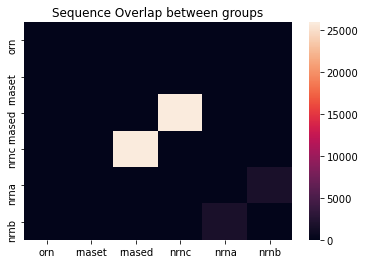

In [6]:
overlap = np.zeros((len(results),len(results)), dtype=np.int32)
cutoff = 50
for i,a in enumerate(results.keys()):
    for j,b in enumerate(results.keys()):
        if not a==b:
            overlap[i,j] = len(set(results[a][results[a].seq_score>cutoff].tname).intersection(
                set(results[b][results[b].seq_score>cutoff].tname)))
overlap = pandas.DataFrame(overlap, index=results.keys(), columns=results.keys())
seaborn.heatmap(overlap)
plt.title("Sequence Overlap between groups")

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


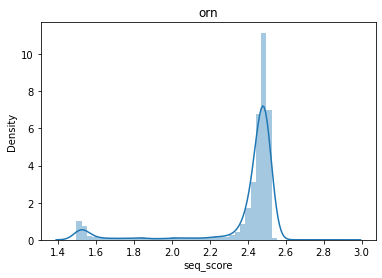

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


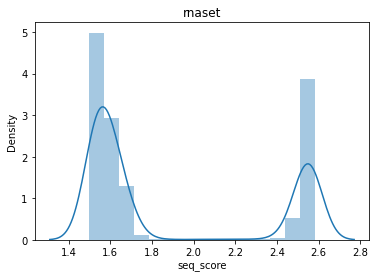

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


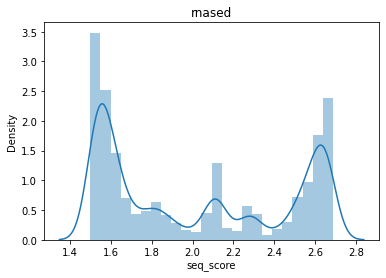

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


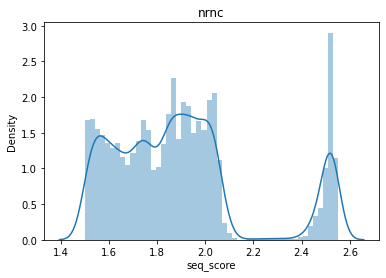

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


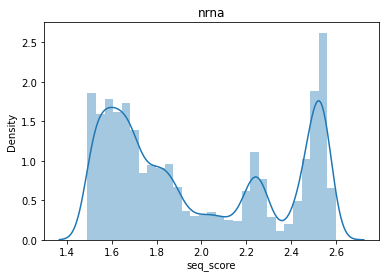

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


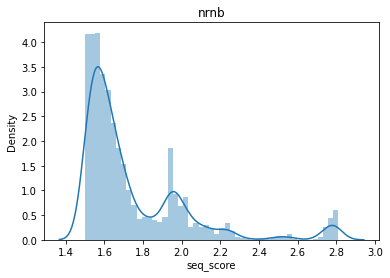

In [7]:
for rnase in results.keys():
    
    seaborn.distplot(np.log10(results[rnase].seq_score))
    plt.title(rnase)
    plt.show()

/home/jonathan/miniconda3/envs/ete/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'RNaseD/NrnC Overlap')

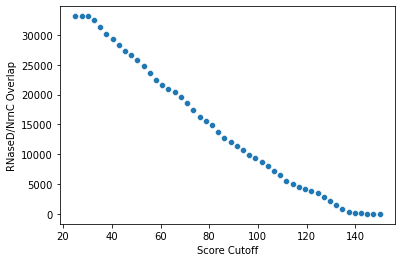

In [8]:
seaborn.scatterplot(np.linspace(25, 150),
    [len(set(results['rnased'][results['rnased'].seq_score>x].tname).intersection(
     set(results['nrnc'][results['nrnc'].seq_score>x].tname))) for x in np.linspace(25, 150)]
)
plt.xlabel('Score Cutoff')
plt.ylabel('RNaseD/NrnC Overlap')

In [336]:
fresults = {}
for rnase in results.keys():
    tresults = domresults[rnase]
    tresults = tresults[tresults.seq_score>125]
    tresults = tresults[tresults.tlen>(tresults.qlen*0.6)]
    tresults = tresults[tresults.tlen<(tresults.qlen*1.5)]
    fresults[rnase] = tresults


In [337]:
cutoff = 50
for rnase in results.keys():
    print('{}: {}'.format(rnase, len(set(fresults[rnase][fresults[rnase].seq_score>cutoff].tname))))

orn: 15483
rnaset: 6160
rnased: 17581
nrnc: 4743
nrna: 17983
nrnb: 1073


In [338]:
for rnase, r in fresults.items():
    r['type'] = rnase
all_res = pandas.concat(fresults.values())

In [339]:
all_res.to_csv('all_hits.csv')

In [340]:
scache = {}
for rnase in results.keys():
    for i, r in tqdm(fresults[rnase].iterrows(), total=len(fresults[rnase])):
        scache[r.tname]=s[r.tname]

In [14]:
import ete3
from ete3 import NCBITaxa
ncbi = NCBITaxa()

In [341]:
taxids = {a: s.annotations['ncbi_taxid'][0] for a, s in scache.items() if s}

In [342]:
spectree = ncbi.get_topology(set(taxids.values()))

In [343]:
spectree_leaves = {l.taxid: l for l in spectree.iter_leaves()}
for l in spectree_leaves.values():
    l.rnase_count=0
for taxid in taxids.values():
    if int(taxid) in spectree_leaves:
        spectree_leaves[int(taxid)].rnase_count += 1
for node in spectree.traverse():
    if not node.is_leaf():
        node.rnase_count = sum(l.rnase_count for l in node.iter_leaves())

In [344]:
ranks = set(n.rank for n in spectree.children[0].traverse())
rank_parents = {rank: set(n.up.rank for n in spectree.children[0].traverse() if n.up and n.rank==rank) for rank in ranks}
rank_children = {rank: set(c.rank  for n in spectree.children[0].traverse() if not n.is_leaf() and n.rank==rank for c in n.children) for rank in ranks}
def get_child(x):
    n = spectree
    for i in range(x):
        n = n.children[0]
    return n
possibilities = {l.taxid: tuple([l.rank])+tuple(n.rank for n in l.get_ancestors() if n.rank!='no rank') for l in spectree.children[0].iter_leaves()}

In [345]:
rank_distance = {'no rank': 0,
                 'clade': 0,
'superkingdom': 0.5,
'kingdom': 1,
'subkingdom': 1.5,
'phylum': 2,
'subphylum': 2.33,
'superclass': 2.66,
'class': 3,
'subclass': 3.25,
'infraclass': 3.5,
'cohort': 3.5,
'superorder': 3.75,
'order': 4,
'suborder': 4.25,
'infraorder': 4.5,
'parvorder': 4.75,
'superfamily': 4.75,
'family': 5,
'subfamily': 5.5,
'tribe': 5.75,
'subtribe':5.825,
'genus': 6,
'subgenus': 6.5,
'section': 6.5,
'species group': 6.5,
'species subgroup': 6.5,
'species': 7,
'forma': 7.5,
'forma specialis': 7.5,
'subspecies': 7.5,
'varietas': 7.5,
'serogroup': 7.5,
'serotype': 7.5,
'biotype': 7.5,
'strain': 8,
'isolate': 8,
'genotype': 8}

for possibility in possibilities.values():
    try:
        for i in range(len(possibility)-1):
            if possibility[i] not in ('no rank', 'clade') and possibility[i+1] not in ('no rank', 'clade'):
                assert rank_distance[possibility[i]]>=rank_distance[possibility[i+1]]
    except:
        print(possibility, possibility[i], possibility[i+1])

In [31]:
import json
with open('uniprot_taxid_counts.json') as i:
    taxid_counts = json.load(i)
taxid_counts = {int(k): v for k,v in taxid_counts.items()}

In [346]:
all_taxa = set([k for k,v in taxid_counts.items() if v>800])
allspectree = ncbi.get_topology(all_taxa)
allspectree_leaves = {l.taxid: l for l in allspectree.iter_leaves()}
allspectree_nodes = {l.taxid: l for l in allspectree.traverse()}

In [347]:
list(taxid_counts.keys())[0]

654924

In [348]:
def prep_tree(tree):
    for l in tree.iter_leaves():
        try:
            l.total_prots = int(taxid_counts[int(l.taxid)])
        except KeyError:
            l.total_prots = 0
    for n in tree.traverse(strategy='levelorder'):
        n.rnase_counts = {rnase: 0 for rnase in fresults.keys()}
        n.dist = max(0, rank_distance[n.rank] - sum(_.dist for _ in n.get_ancestors()))

In [349]:
prep_tree(allspectree)
for rnase in results.keys():
    for i, r in tqdm(fresults[rnase].iterrows(), total=len(fresults[rnase]), ):
        if scache[r.tname]:
            taxid = int(scache[r.tname].annotations['ncbi_taxid'][0])
            if taxid in allspectree_leaves:
                allspectree_leaves[taxid].rnase_counts[rnase] += 1


In [350]:
def count_prots(tree):
    for n in tree.traverse(strategy='postorder'):
        if not n.is_leaf():
            n.total_prots = sum(c.total_prots for c in n.children)
            for rnase in results.keys():
                n.rnase_counts[rnase] = sum(c.rnase_counts[rnase] for c in n.children)

In [351]:
count_prots(allspectree)

In [352]:
allspectree.rnase_counts

{'orn': 13723,
 'rnaset': 5087,
 'rnased': 15437,
 'nrnc': 4412,
 'nrna': 15376,
 'nrnb': 785}

In [353]:
rnase_taxid_data = pandas.DataFrame(columns=results.keys(), index=set(n.taxid for n in allspectree.traverse())).fillna(0)
rnase_taxid_data.index.name = 'taxid'
for l in allspectree_nodes.values():
    for rnase in results.keys():
        rnase_taxid_data[rnase][l.taxid] = l.rnase_counts[rnase]
rnase_taxid_data['total_proteins'] = [int(allspectree_nodes[t].total_prots) for t in rnase_taxid_data.index]
rnase_taxid_data['taxon_label'] = [allspectree_nodes[t].named_lineage[-1] if t in allspectree_nodes else 'unknown' for t in rnase_taxid_data.index]
rnase_taxid_data['taxon_rank'] = [allspectree_nodes[t].rank if t in allspectree_nodes else 'unknown' for t in rnase_taxid_data.index]

In [354]:
rnase_taxid_data.sort_index().head()

,orn,rnaset,rnased,nrnc,nrna,nrnb,total_proteins,taxon_label,taxon_rank
taxid,,,,,,,,,
1,13723,5087,15437,4412,15376,785,156285064,root,no rank
2,11457,5034,15020,4362,14846,741,110965962,Bacteria,superkingdom
6,0,0,2,4,0,0,14767,Azorhizobium,genus
9,0,0,0,0,0,0,889,Buchnera aphidicola,species
10,9,10,10,0,0,0,41209,Cellvibrio,genus


In [355]:
rnase_taxid_data[rnase_taxid_data.total_proteins>0].sort_index().head()

,orn,rnaset,rnased,nrnc,nrna,nrnb,total_proteins,taxon_label,taxon_rank
taxid,,,,,,,,,
1,13723,5087,15437,4412,15376,785,156285064,root,no rank
2,11457,5034,15020,4362,14846,741,110965962,Bacteria,superkingdom
6,0,0,2,4,0,0,14767,Azorhizobium,genus
9,0,0,0,0,0,0,889,Buchnera aphidicola,species
10,9,10,10,0,0,0,41209,Cellvibrio,genus


In [366]:
#These taxids are not understood by iTOL, so get rid of them.
tax_ignore = {
    'class': ('2682225', '1703755', '422282', '640293', '1618339', '2605435', '2683628'),
    'order': ('2704647', '2683628', '2726947', '2726947', '2558200', '1703755', '422282', '640293', '1618339', '2691354',
             '2770089', '2682225',),
    'family': (),
    'genus': (),
}

In [367]:
def gen_taxtrees(tree):
    trees = {}
    for cutoff, name in zip(range(3,7), ('class', 'order', 'family', 'genus')):
        trees[name] = tree.copy()
        for n in trees[name].traverse(strategy='levelorder'):
            if n.rank=='no rank':
                n.delete()
            if n.rank=='clade':
                n.delete()
            if str(n.taxid) in tax_ignore[name]:
                n.delete()
        for n in trees[name].traverse(strategy='levelorder'):
            if max(0,0,*[rank_distance[c.rank] for c in n.get_ancestors()+[n]])>cutoff:
                n.detach()
            elif 'nclassified' in ''.join(n.named_lineage):
                n.detach()
            elif 'andidatus' in ''.join(n.named_lineage):
                n.detach()
            elif 'environmental' in ''.join(n.named_lineage):
                n.detach()
            elif 'Viruses' in ''.join(n.named_lineage):
                n.detach()
    
    return trees

In [368]:
taxtrees = gen_taxtrees(allspectree)

In [369]:
for level, tree in taxtrees.items():
    with open('allspectree_{}.nwk'.format(level), 'w') as o:
        o.write(tree.write())
with open('allspectree.nwk', 'w') as o:
    o.write(allspectree.write())

In [360]:
rnase_taxid_data.to_csv('all_taxids_rnase_counts.csv')

In [361]:
print([(l.taxid, l.named_lineage[-1], l.rank) for l in taxtrees['class'].iter_leaves()])

[(1236, 'Gammaproteobacteria', 'class'), (28216, 'Betaproteobacteria', 'class'), (28211, 'Alphaproteobacteria', 'class'), (28221, 'Deltaproteobacteria', 'class'), (29547, 'Epsilonproteobacteria', 'class'), (1553900, 'Oligoflexia', 'class'), (580370, 'Zetaproteobacteria', 'class'), (203693, 'Nitrospira', 'class'), (203692, 'Spirochaetia', 'class'), (203490, 'Fusobacteriia', 'class'), (508458, 'Synergistetes', 'phylum'), (200940, 'Thermodesulfobacteria', 'phylum'), (204432, 'Acidobacteriia', 'class'), (1562566, 'Blastocatellia', 'class'), (187857, 'Aquificae', 'class'), (188708, 'Thermotogae', 'class'), (74152, 'Elusimicrobia', 'phylum'), (1930617, 'Calditrichaeota', 'phylum'), (1760, 'Actinobacteria', 'class'), (84998, 'Coriobacteriia', 'class'), (84992, 'Acidimicrobiia', 'class'), (84995, 'Rubrobacteria', 'class'), (1497346, 'Thermoleophilia', 'class'), (908620, 'Nitriliruptoria', 'class'), (91061, 'Bacilli', 'class'), (186801, 'Clostridia', 'class'), (909932, 'Negativicutes', 'class')

In [362]:
def gen_itol_multilabel_dataset(tree, values, labels, colors, name='Test', null_label='None', threshold=0.5):
    
   
    data_text = ''
    data_text+='DATASET_BINARY\n'
    
    data_text += 'SEPARATOR TAB\nDATASET_LABEL\t{}\nCOLOR\t{}\n'.format(name, '#000000')

    data_text += 'LEGEND_TITLE\t{}\n'.format(name)
    data_text += 'LEGEND_SHAPES\t{}\n'.format('\t'.join('1' for _ in labels))
    data_text += 'LEGEND_LABELS\t{}\n'.format('\t'.join(labels))
    data_text += 'LEGEND_COLORS\t{}\n'.format('\t'.join(colors))
    
    data_text += 'FIELD_SHAPES\t{}\n'.format('\t'.join('1' for _ in labels))
    data_text += 'FIELD_LABELS\t{}\n'.format('\t'.join(labels))
    data_text += 'FIELD_COLORS\t{}\n'.format('\t'.join(colors))
    
    data_text += 'SHOW_INTERNAL\t0\n'
    
    data_text += 'DATA\n'
    
    for l in tree.iter_leaf_names():
        data_text += f'{l}'
        for s in values:
            if s[l]>threshold:
                val=1
            elif s[l]==0.0:
                val=-1
            else:
                val=0
            data_text += f'\t{val}'
        data_text += '\n'
    

    return data_text

In [363]:
assemblies = pandas.read_table('prokaryotes.txt', low_memory=False)
assemblies2 = pandas.read_table('eukaryotes.txt', low_memory=False)
assemblies = pandas.concat([assemblies,assemblies2])

In [364]:
#refs = assemblies[((assemblies.Reference=='REFR') | (assemblies.Reference=='REPR') | (assemblies.Status=='Complete Genome') | (assemblies.Status=='Chromosome')) & (assemblies.Proteins!='-')]
refs = assemblies[(assemblies.Proteins!='-')]
refs = refs.copy()
refs.Proteins = refs.Proteins.astype(int)

In [319]:
ref_ids = set(assemblies.TaxID)
av_sizes = {}
def get_average_genome_size(txid):
    if txid in av_sizes:
        return av_sizes[txid]
    proteins = []
    for desc in ncbi.get_descendant_taxa(int(txid)):
        if desc in ref_ids:
            if refs[refs.TaxID==desc].Proteins.mean() > 0:
                proteins.append(refs[refs.TaxID==desc].Proteins.mean())
    av_sizes[txid] = sum(proteins)/len(proteins) if proteins else (get_average_genome_size(ncbi.get_lineage(int(txid))[3]) if ncbi.get_lineage(int(txid))[3]!=txid else 3920)
    return av_sizes[txid]

In [370]:
rnase_labels = {'orn': 'Orn', 'rnaset': 'RNase T', 'rnased': 'RNase D', 'nrnc': 'NrnC', 'nrna': 'NrnA', 'nrnb': 'NrnB'}
rnase_colors = {'orn': 'rgb(127,60,141)', 'rnaset': 'rgb(17,165,121)', 'rnased': 'rgb(57,105,172)', 'nrnc': 'rgb(242,183,1)', 'nrna': 'rgb(231,63,116)', 'nrnb': 'rgb(230,131,16)'}
for level, tree in taxtrees.items():
    sets, labels, colors = [], [], []
    for rnase in ('orn', 'nrna', 'nrnb', 'nrnc', 'rnaset', 'rnased'):
        prevalance = {}
        for ln in tqdm(tree.get_leaf_names()):
            prevalance[ln] = allspectree_nodes[int(ln)].rnase_counts[rnase]/allspectree_nodes[int(ln)].total_prots*(get_average_genome_size(ln))
        sets.append(prevalance)
        labels.append(rnase_labels[rnase])
        colors.append(rnase_colors[rnase])
    with open(f'allspectree_{level}.itol-rnase.txt', 'w') as o:
        o.write(gen_itol_multilabel_dataset(tree, sets, labels, colors, 'RNase Presence'))